In [4]:
import nibabel as nib
import numpy as np
import os

flat_data = []
all_data = []
ages = []
sexes = []
dementiaClass = []
non_zeros = np.load('non_zeros.npy')
fails = 0
rootDir = 'data'
dirName, subdirList, fileList = os.walk(rootDir).next()
for f in sorted(fileList):
    if "MR1" not in f: continue
    if "txt" in f: 
        sessionID = f.split('.')[0]
        with open(rootDir + "/" + f) as metadataFile:
            for line in metadataFile:
                if "AGE:" in line:
                    ages.append(int(list(filter(None, line.split()))[1]))
                elif "M/F:" in line:
                    sexes.append(list(filter(None, line.split()))[1])
                elif "CDR" in line:
                    try:
                        dementiaClass.append(int(list(filter(None, line.split()))[1]))
                    except:
                        fails += 1
                        dementiaClass.append(-1)
                    break
                
    elif "img" in f:
        data = nib.load(rootDir + "/" + f).get_data()
        # print data.shape
        all_data.append(data)
        #flat_data.append(data.flatten(order='C')[non_zeros])
        #flat_data.append(data.flatten(order='F')[non_zeros])

#flat_data_np = np.array(flat_data)
all_data = np.squeeze(np.array(all_data))
ages = np.array(ages, dtype='float64')
dementiaClass = np.array(dementiaClass)
                                
# WARNING: UNCOMMENTING THE FOLLOWING LINES WILL OVERWRITE YOUR BACKUPS

#np.save('flat_data2', flat_data_np)
#np.save('ages2', ages)
#np.save('sexes2', sexes)
#np.save('dementia', dementiaClass)

### Creating histograms from data

In [ ]:
split_num = 3
n_bins = 20


x_chunk_size = all_data.shape[1]/split_num
y_chunk_size = all_data.shape[2]/split_num
z_chunk_size = all_data.shape[3]/split_num

hist_data = []

for scan in all_data:
    scan_hists = np.array([])
    i = 0
    for x_ind in range(0,split_num):
        for y_ind in range(0,split_num):
            for z_ind in range(0,split_num):
                chunk = scan[x_ind*x_chunk_size:(x_ind+1)*x_chunk_size, 
                             y_ind*y_chunk_size:(y_ind+1)*y_chunk_size,
                             z_ind*z_chunk_size:(z_ind+1)*z_chunk_size]
                #print chunk.shape
                scan_hists = np.append(scan_hists, np.histogram(np.array(chunk).flatten(), bins=n_bins)[0])
    # print scan_hists.shape, scan_hists.dtype
    hist_data.append(scan_hists)

hist_data = np.array(hist_data)

# freeing up mem
scan_hists = None
chunk = None

In [3]:
np.save('hist_data', flat_data_filtered)
#hist_data.shape

In [6]:
import numpy as np

ages = np.load('ages.npy')
sexes = np.load('sexes.npy')
# flat_data_np = np.load('flat_data.npy')
#flat_data_np = np.load('hist_data.npy')

In [2]:
# finding items, that are equal everywhere
notTheSame = np.where(np.not_equal(flat_data_np[0], flat_data_np[1]))[0]
for element in flat_data_np:
    inds = np.where(np.not_equal(flat_data_np[0], flat_data_np[1]))[0]
    notTheSame = np.intersect1d(notTheSame, inds)
    
flat_data_filtered = flat_data_np[:,notTheSame]
flat_data_np = None
notTheSame = None # freeing up some memory
flat_data_filtered.shape

(416, 511)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

X = SelectKBest(chi2, k=200).fit_transform(flat_data_filtered, ages)
np.save('X', X)

In [ ]:
from sklearn.decomposition import PCA,IncrementalPCA,FactorAnalysis
import matplotlib.pyplot as plt
%matplotlib inline

try: 
    X = flat_data_filtered
except NameError:
    X = flat_data_np
    
#transformer = IncrementalPCA(batch_size=105, n_components=100)
#transformer = FactorAnalysis(n_components=100)
transformer = PCA(n_components=100)
model = transformer.fit(X, ages)
plt.plot(model.explained_variance_)

In [ ]:
transformedData = model.transform(X)
np.save('X',transformedData)

163

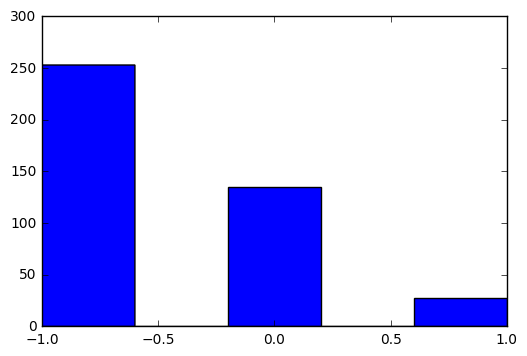

In [32]:
#transformedData = np.load('transformedData2.npy')
import matplotlib.pyplot as plt
%matplotlib inline
dementiaClass = np.array(dementiaClass)
plt.hist(dementiaClass.astype('int16'), bins=5)#[np.where(dementiaClass == 0)])
sum(dementiaClass != -1)
#dementiaClass.dtype
#min(transformedData[:,4]), max(transformedData[:,4])

#import pandas
#from collections import Counter
#counts = Counter(sexes)
#df = pandas.DataFrame.from_dict(counts, orient='index')
#df.plot(kind='bar', legend=False)
